# Lab 4: Basic regression - Predict fuel efficiency



## Imports

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns # we use this library to load the dataset
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

## Load data

In [25]:
# Load the 'mpg' dataset using seaborn library into a Pandas DataFrame
df = sns.load_dataset('mpg')

MPG dataset can be viewed online at  
https://github.com/mwaskom/seaborn-data/blob/master/mpg.csv

## Data Exploration - Pandas Review

### Show the first 5 rows of the dataset

In [26]:
df.head(5)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


### Show the size of the dataframe

In [27]:
df.shape # 398 records and 9 columns

(398, 9)

### Find the columns name and their types (numerical or categorical)

In [28]:
#df.describe()
print(df.columns)

for col in df.columns:
  print(col, df[col].dtype)


print(df.info()) #Get data types and the null/not null count
print(df.dtypes) #This is a succint way to get the datatype of the values in aech column
print(df.describe())

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')
mpg float64
cylinders int64
displacement float64
horsepower float64
weight int64
acceleration float64
model_year int64
origin object
name object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB
None
mpg             float64
cylinders         int64
displacement    f

### Find the number of missing values in each column

In [29]:
print(df.isna().sum())
#horsepower 392 non-null float 64
#Count all the N/A / empty values
print(df.isnull().sum())

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64
mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64


### Handle the missing values in the dataframe

Since the number of missing values is low, we can simply drop the rows containing them. However, as a practice and review, let's substitute the missing values in the numerical columns (if any) with the mean of the respective column and the missing values in the categorical columns (if any) with the median of the respective column.

In [30]:
df.horsepower.fillna(df.horsepower.mean(), inplace=True)
print(df.isna().sum())

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64


<ipython-input-30-88ebc1a43bc3>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.horsepower.fillna(df.horsepower.mean(), inplace=True)


### Compute the average and the median weight

In [31]:
#your code here
print(df.weight.mean())
print(df.weight.median())

2970.424623115578
2803.5


### Find the number of cars that weight more than 2000 kgs

In [32]:
#your code here
numHevyCars = sum(df.weight > 2000*2.2) #Vehicle weight in pounds is given (numercial)
# 1kg = 2.2 pounds
print(numHevyCars)

26


### Find how many cars there are for each number of cylinders

In [33]:
#your code here
df.cylinders.value_counts() #Categorizees the unique values and

,count
cylinders,
4,204
8,103
6,84
3,4
5,3


### Find what are the car models with number of cylinders (3 or 5)

In [34]:
#your code here
print(df.cylinders.value_counts()[3:5])
print(df.name.groupby(df.cylinders).get_group(3)[0:3])
print(df.groupby("cylinders").count().name[0:3:2])

cylinders
3    4
5    3
Name: count, dtype: int64
71     mazda rx2 coupe
111          maxda rx3
243         mazda rx-4
Name: name, dtype: object
cylinders
3    4
5    3
Name: name, dtype: int64


### Show the `value_counts()` of `origin` column or show the unique values of this column.

In [35]:
#your code here
df.origin.value_counts()

,count
origin,
usa,249
japan,79
europe,70


## Data Preprocessing

### Use one hot encoding to change the categorical values of `origin` column to numerical values.

- use `pd.get_dummies()` method to do the encoding

In [36]:
#your code here
df = pd.get_dummies(df, columns=['origin'])
print(df.head())

    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model_year                       name  origin_europe  origin_japan  \
0          70  chevrolet chevelle malibu          False         False   
1          70          buick skylark 320          False         False   
2          70         plymouth satellite          False         False   
3          70              amc rebel sst          False         False   
4          70                ford torino          False         False   

   origin_usa  
0        True  
1        True  
2        True  
3        True  
4        True  


### Remove the name column form the dataframe to have all numerical dataframe.

In [37]:
#your code here
df_preprocessed = df.drop('name', axis=1)
print(df_preprocessed.head())

    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model_year  origin_europe  origin_japan  origin_usa  
0          70          False         False        True  
1          70          False         False        True  
2          70          False         False        True  
3          70          False         False        True  
4          70          False         False        True  


### Does the input needs reshaping?

In [38]:
#your code here
print(df_preprocessed.shape)
print(df_preprocessed)

#No we dont need re-shaping - If we had image data, we would want to flatten the pizel values

(398, 10)
      mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    18.0          8         307.0       130.0    3504          12.0   
1    15.0          8         350.0       165.0    3693          11.5   
2    18.0          8         318.0       150.0    3436          11.0   
3    16.0          8         304.0       150.0    3433          12.0   
4    17.0          8         302.0       140.0    3449          10.5   
..    ...        ...           ...         ...     ...           ...   
393  27.0          4         140.0        86.0    2790          15.6   
394  44.0          4          97.0        52.0    2130          24.6   
395  32.0          4         135.0        84.0    2295          11.6   
396  28.0          4         120.0        79.0    2625          18.6   
397  31.0          4         119.0        82.0    2720          19.4   

     model_year  origin_europe  origin_japan  origin_usa  
0            70          False         False        True  
1      

### Split the data into training and test sets and form `train_features`, `train_labels`, `test_features`, `test_labels`

In [39]:
from sklearn.model_selection import train_test_split
train_df, test_df= train_test_split(df_preprocessed, test_size=0.2, random_state=66)
print(train_df.shape)
print(test_df.shape)
#print(test_X.shape)
#print(test_Y.shape)

train_labels = train_df.iloc[:, 0] #This column is the mmpg column which we have chosen as the label/target/answer
train_features = train_df.iloc[:, 1:]
test_labels = test_df.iloc[:, 0]
test_features = test_df.iloc[:, 1:]

print(train_labels.shape)
print(train_features.shape)
print(test_labels.shape)
print(test_features.shape)

(318, 10)
(80, 10)
(318,)
(318, 9)
(80,)
(80, 9)


### For simplicity in the following steps, convert the dataset from a pandas DataFrame to a numpy array.

In [40]:
train_features = np.array(train_features)
train_labels = np.array(train_labels)
test_features = np.array(test_features)
test_labels = np.array(test_labels)

## Normalization layer

To ensure stable training of neural networks, we typically normalize the data. This process also enhances the convergence of the gradient descent algorithm.

There is not single way to normalize the data. You can also use `scikit-learn `or `pandas` to do it. However, in this lab, we will use the normalization layer provided by tensorflow which matches the other parts of the model.

The `tf.keras.layers.Normalization` is a clean and simple way to add feature normalization into your model.

The first step is to create the layer:

In [46]:
normalizer = tf.keras.layers.Normalization(axis=-1)

Then, fit the state of the preprocessing layer to the data by calling `Normalization.adapt`.

It calculates the mean and variance of each feature, and store them in the layer

In [49]:
train_features = train_features.astype('float32')
train_labels = train_labels.astype('float32')
test_features = test_features.astype('float32')
test_labels = test_labels.astype('float32')
normalizer.adapt(train_features)

When the layer is called, it returns the input data, with each feature independently normalized.

In [50]:
first = train_features[0]
print('First example:', first)
print()
print('Normalized:', normalizer(first).numpy())

First example: [8.000e+00 3.040e+02 1.500e+02 4.257e+03 1.550e+01 7.400e+01 0.000e+00
 0.000e+00 1.000e+00]

Normalized: [[ 1.5064653   1.055704    1.2138655   1.4939598  -0.04007326 -0.55780476
  -0.47728318 -0.4970501   0.7889544 ]]


## **Approach #1:** Regression using `Linear Regression`

**You are welcome to use scikit-learn to perform linear regression on this dataset.**

However, here we aim to implement it using TensorFlow.

- As we saw in Lab Week 2, `logistic regression` is essentially a single neuron with a `sigmoid` activation function.

- Similarly, `linear regression` can be viewed as a single neuron with a `linear` activation function.

### **Step 1:** Linear regression model architecture

In [51]:
linear_model = tf.keras.Sequential([
    normalizer,
    layers.Dense(1, activation='linear')
])

**Note:** You can define your model all at once like the cell above or you can buid the model incrementaly  (suitable for your assignment)

In [52]:
# Defining the model incrementaly (suitable for your assignment)
linear_model = tf.keras.Sequential()
linear_model.add(normalizer)
linear_model.add(layers.Dense(1, activation='linear'))

### **Step 2:** Configure the model with Keras `Model.compile()`

The most important arguments to compile are the `loss` and the `optimizer`, since these define what will be optimized (`"mean_absolute_error"`) and how (using the `tf.keras.optimizers.Adam(learning_rate=0.1)`).

**arguments:**
- optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
- loss='mean_absolute_error'

In [53]:
linear_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
                     loss='mean_absolute_error')

### **Step 3:** Train the model using the `Model.fit()` for `100` epochs, and store the output in a variable named history.

In [54]:
history = linear_model.fit(train_features, train_labels, epochs=100)

Epoch 1/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 23.6069
Epoch 2/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 22.6270  
Epoch 3/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 21.9582 
Epoch 4/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 20.5294 
Epoch 5/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 19.7353 
Epoch 6/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 18.9711 
Epoch 7/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 18.2615 
Epoch 8/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 16.5900 
Epoch 9/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 16.0466 
Epoch 10/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 15.1420 
Epoch 11/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 13.1732 
Epoch 12/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 12.4518 
Epoch 13/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 11.1992
Epoch 14/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 10.6585 
Epoch 15/100
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 

In [55]:
history.history

{'loss': [23.346248626708984,
  22.30065155029297,
  21.310007095336914,
  20.30720329284668,
  19.30375099182129,
  18.309728622436523,
  17.311777114868164,
  16.306533813476562,
  15.307867050170898,
  14.302651405334473,
  13.306487083435059,
  12.321290969848633,
  11.336304664611816,
  10.34830379486084,
  9.33846378326416,
  8.36695384979248,
  7.375091552734375,
  6.474448204040527,
  5.61865758895874,
  4.795059680938721,
  4.192418575286865,
  3.5619442462921143,
  3.1221938133239746,
  2.8490002155303955,
  2.6796677112579346,
  2.592294454574585,
  2.5730345249176025,
  2.568798542022705,
  2.607022523880005,
  2.584163188934326,
  2.5626134872436523,
  2.5129644870758057,
  2.4944558143615723,
  2.5041885375976562,
  2.4936916828155518,
  2.5007081031799316,
  2.4966678619384766,
  2.496419906616211,
  2.501802921295166,
  2.498593330383301,
  2.5009727478027344,
  2.484748601913452,
  2.479870319366455,
  2.479078769683838,
  2.4840972423553467,
  2.4892256259918213,
  2.

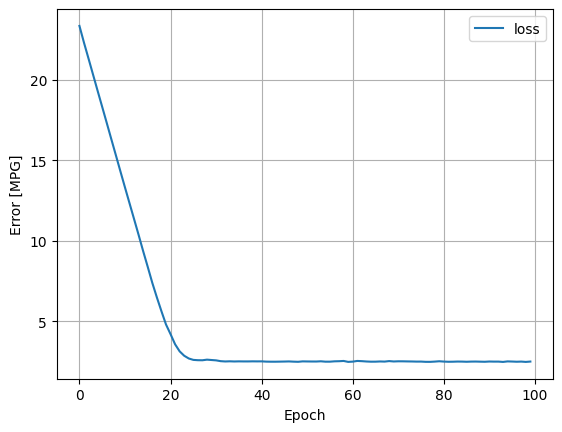

In [56]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.xlabel('Epoch')
  plt.ylabel('Error [MPG]')
  plt.legend()
  plt.grid(True)

plot_loss(history)

### Get the model summary

In [57]:
linear_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ normalization_2 (Normalization)      │ (None, 9)                   │              19 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              10 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 51 (212.00 B)

 Trainable params: 10 (40.00 B)

 Non-trainable params: 19 (80.00 B)

 Optimizer params: 22 (92.00 B)

### **Step 4:** Evaluate the linear model on the test set using Keras `Model.evaluate()` and see the `mean_absolute_error` and save the result for future comparison.

In [65]:
#your code here
test_loss = linear_model.evaluate(test_features, test_labels, verbose=0)
print("Mean Absolute Error on Test Set:", test_loss)
linear_model_mae = test_loss

Mean Absolute Error on Test Set: 2.4431354999542236


## **Approach #2:** Regression using a `Deep Neural Network (DNN)`

### Solve the same problem and using deep neural network with the sample architecture;
- 1st hidden layer no. of units =  64
- 2nd hidden layer no. of units = 64
- Choose appropriate `activation` functions for hidden and output layers

In [68]:
#your code here
model_dnn = tf.keras.Sequential([
    normalizer,
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='linear')  # Output layer
])

model_dnn.compile(optimizer='adam', loss='mse', metrics=['mae'])

history = model_dnn.fit(train_features, train_labels, epochs=50, validation_split=0.2, verbose=1)

Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 199ms/step - loss: 608.7089 - mae: 23.2712 - val_loss: 562.5615 - val_mae: 22.5182
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 572.2125 - mae: 22.4661 - val_loss: 530.1862 - val_mae: 21.7812
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 531.8294 - mae: 21.6697 - val_loss: 493.7006 - val_mae: 20.9071
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 496.7776 - mae: 20.7999 - val_loss: 450.5726 - val_mae: 19.8265
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 447.0770 - mae: 19.6211 - val_loss: 399.1249 - val_mae: 18.4586
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 413.6405 - mae: 18.5456 - val_loss: 338.5362 - val_mae: 16.7358
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 328.2397 - mae: 16.2385 - val_loss: 271.4417 - val_mae: 14.7171
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 242.6356 - mae: 13.7607 - val_loss: 202.5465 - val_mae: 12.6470
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━

### Print the model summary (after training). How many parameters are there in the model?

In [69]:
model_dnn.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ normalization_2 (Normalization)      │ (None, 9)                   │              19 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,616 (57.10 KB)

 Trainable params: 4,865 (19.00 KB)

 Non-trainable params: 19 (80.00 B)

 Optimizer params: 9,732 (38.02 KB)

### You can see even this small model has more than 4000 trainable parameters. The more the number of parameters, the longer the training time and cost. Search the net and see how many trainable parameters does the `ChatGPT` model have? What about `DeepSeek` model? (Optional)

In [ ]:
ChatGPT Model:
ChatGPT has billions of trainable parameters, with GPT-3 containing 175 billion.

DeepSeek Model:
DeepSeek or models of similar scope also have parameters in the millions to billions range, as they're typically used for highly complex tasks like image analysis or genomic studies.

## Compare the evaluation result of the two approaches, i.e., linear regression and deep neural network.

In [74]:
#your code here
dnn_loss, dnn_mae = model_dnn.evaluate(test_features, test_labels, verbose=0)
print(f"DNN Model - Loss: {dnn_loss}, MAE: {dnn_mae}")
print("Mean Absolute Error on Test Set _Linear Model:", linear_model_mae)
#The DNN model outperforms the linear regression model on the test set, as evidenced by the lower Mean Absolute Error (MAE)

DNN Model - Loss: 8.085902214050293, MAE: 2.1012790203094482
Mean Absolute Error on Test Set _Linear Model: 2.4431354999542236


## Use the following large model and evaluate it on the test set.

In [76]:
model_dnn_large = tf.keras.Sequential([
    normalizer,
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='linear')
])
model_dnn_large.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the large model
history_large = model_dnn_large.fit(train_features, train_labels, epochs=50, validation_split=0.2, verbose=1)

# Evaluate the larger model
large_loss, large_mae = model_dnn_large.evaluate(test_features, test_labels, verbose=0)
print(f"Larger DNN Model - Loss: {large_loss}, MAE: {large_mae}")

Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 129ms/step - loss: 616.3467 - mae: 23.5348 - val_loss: 536.6941 - val_mae: 21.9443
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 553.8815 - mae: 22.0038 - val_loss: 445.8051 - val_mae: 19.7045
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 428.1224 - mae: 18.9498 - val_loss: 290.7556 - val_mae: 15.3062
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 240.5267 - mae: 13.4925 - val_loss: 109.1715 - val_mae: 8.9139
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 78.4554 - mae: 7.4877 - val_loss: 64.9208 - val_mae: 6.5649
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 68.2173 - mae: 6.8781 - val_loss: 30.0861 - val_mae: 4.5739
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 27.8608 - mae: 4.1256 - val_loss: 26.4606 - val_mae: 4.0640
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 25.3797 - mae: 3.9242 - val_loss: 18.5734 - val_mae: 3.3520
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step

### Explain your observation. Why do you think the large model is not performing well?

- hint: when the number of trainable parameters is very large (even larger than the number of data points), the model may overfit the training data.One way to solve this problem is to use more data.

Performance:
The larger model may perform worse on the test set due to overfitting, especially if the dataset is small.

Why Overfitting Happens:
When the number of trainable parameters in the model exceeds the number of data points, the model can memorize the training data instead of generalizing to unseen data.

